# Deep Learning Tutorial 1: Build an Image Recognizer on your dataset in less 10 minutes

This tutorial is a concise step-by-step guide for building and training an Image Recongizer on **any** image dataset of your choice.<br>

In this tutorial, you will learn how to:

- Scrape images from Google Images and create your own dataset
- Build and train an image recognizer on your dataset
- Visualize and adequately interpret classification results
- Test model with new images

To run this notebook, you can simply use Google Colab [here](https://colab.research.google.com/github/SalChem/Fastai-iNotes-iTutorials/blob/master/Image_Recognizer_Tutorial.ipynb).

<br>Once in Colab, **make sure to change the following to enable GPU backend,** <br>
> Runtime -> Change runtime type -> Hardware Accelerator -> GPU

## 1. Image Dataset Download and Setup

**Option 1:** Working with a ready dataset of your own

If you would like to use your own image dataset for this tutorial, rearrange it in a way that images of same class are under same folder. Then, name the folders with the corresponding class labels.

**Option 2:** Scrapping images from Google Images

If you do not have a dataset in-hand, you can scrape images from [Google Images](https://www.google.com/imghp?hl=en) and make up a dataset of your choice. In order to do so, simply install [Fatkun Batch Download Image](https://chrome.google.com/webstore/detail/fatkun-batch-download-ima/nnjjahlikiabnchcpehcpkdeckfgnohf) extension on your google chrome browser and download any set of google images by clicking the extension tab. Place all images of same class under same folder and name it accordingly with the class label.  

**Option 3:** Working with my Monkeys dataset :)

You can easily download the dataset folder by uncommenting the command on the next cell.

In [87]:
%%capture
!wget "https://www.dropbox.com/s/35ithckx6vqryob/Monkeys_Faces_Dataset.tar?dl=0" -O Monkeys_Faces_Dataset.tar  
!tar --warning=no-unknown-keyword -xzf Monkeys_Faces_Dataset.tar

In this tutorial, we will be classifying **Monkeys**, so we created 6 folders corresponding to 6 different types of monkeys, as shown below.<br><br>

<img width="186" alt="Tutorial1_img1" src="https://user-images.githubusercontent.com/8379428/56703803-5c9b9e80-66bf-11e9-8341-67873c896afb.png">


## 2. Image Recognition

**For a further explanation of the code and functions used within this notebook, check out my other post: [Concise Notes on Image Recognition, Fastai 2019 v3 Lesson 1](https://github.com/SalChem/Fastai-iNotes-iTutorials/blob/master/Image_Recognition_Basics.ipynb)**

### Initialization

In [88]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [89]:
from fastai.vision import *
from fastai.metrics import error_rate

In [90]:
bs = 64  #batch size: if your GPU is running out of memory, set a smaller batch size, i.e 16
sz = 224 #image size
PATH = './Monkeys Faces/'

PATH is the path containing all the class folders. You may keep './Monkeys Faces' if you are using Monkeys dataset. Otherwise, specify the path of your folders.

Let's retrieve the image classes,

In [91]:
classes = []
for d in os.listdir(PATH):
    if os.path.isdir(os.path.join(PATH, d)) and not d.startswith('.'):
        classes.append(d) 
print ("There are ", len(classes), "classes:\n", classes)            

There are  6 classes:
 ['Macaque', 'Orungatun', 'Chimpanzee', 'Gorilla', 'Mandrill', 'Gibbon']


Let's verify there are not any corrupt images that cannot be read. If found any, they will simply be deleted.

In [92]:
for c in classes:
    print ("Class:", c)
    verify_images(os.path.join(PATH, c), delete=True);

Class: Macaque


Class: Orungatun


Class: Chimpanzee


Class: Gorilla


Class: Mandrill


Class: Gibbon


### Creating and training the classifier

Let's create training and validation sets,

In [93]:
data  = ImageDataBunch.from_folder(PATH, ds_tfms=get_transforms(), size=sz, bs=bs, valid_pct=0.2).normalize(imagenet_stats)

In [94]:
print ("There are", len(data.train_ds), "training images and", len(data.valid_ds), "validation images." )

There are 268 training images and 67 validation images.


Let's visualize some images from different classes,

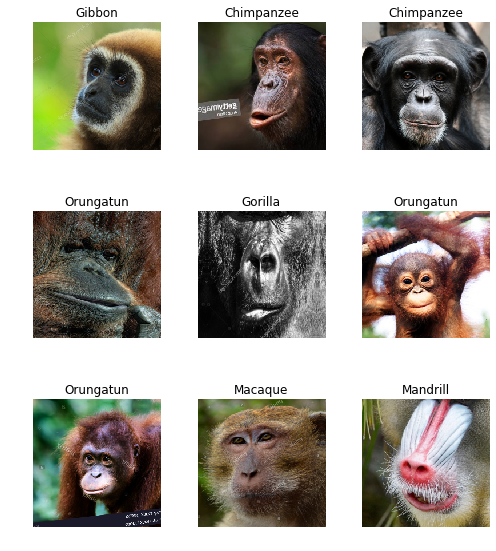

In [95]:
data.show_batch(rows=3, figsize=(7,8))

Let's build our Deep Convolutional Neural Network (CNN),

In [96]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

Let's pick the appropriate learning rate parameter,

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


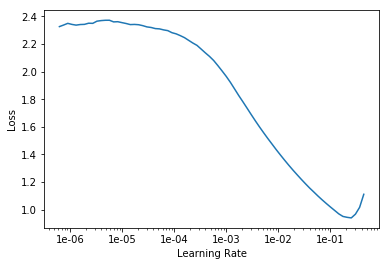

In [97]:
learn.lr_find();
learn.recorder.plot()

Use the above plot to pick adequate learning rates for your model. We need two learning rates since we are using [cyclic learning rates](https://arxiv.org/pdf/1506.01186.pdf):

- The first learning rate is just before the loss starts to increase, preferrably 10x smaller than the rate at which the loss starts to increase. For instance, 1e-02 for our Monkeys Face Recognition dataset. 

- The second learning rate is 10x smaller than the first learning rate, so 1e-03 in our example.

The plot will be different for your dataset, so make sure to pick these two learning rates accordingly.

<br>Replace your chosen learning rates in the **slice** fucntion below and let's train the model

In [98]:
learn.fit_one_cycle(4, max_lr=slice(1e-3,1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,1.679428,0.431608,0.805970,00:07
1,0.902719,0.107861,0.955224,00:07
2,0.605526,0.071582,0.955224,00:07
3,0.446685,0.064092,0.970149,00:07


Great, we achieved a high classification accuracy with only a few lines of code and without much tuning of the parameters.

We are DONE but let's further interpret the results.

## 3. Results Interpretation and Visualization

In [99]:
interp = ClassificationInterpretation.from_learner(learn)

We can start by visualizing a confusion matrix. The diagonal elements represent the number of images for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier.

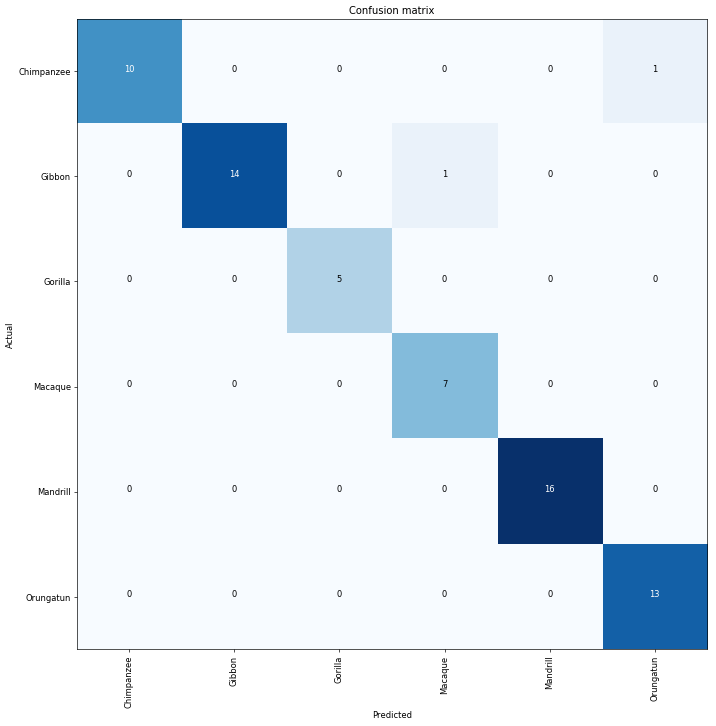

In [100]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

We can also plot images with top losses. A high loss implies high confidence about the wrong answer. 

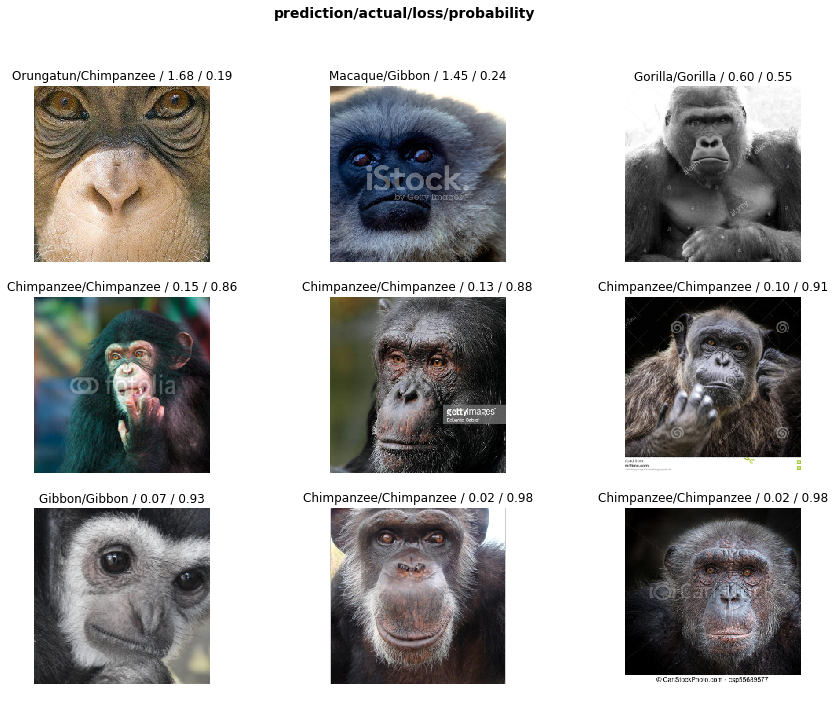

In [101]:
interp.plot_top_losses(9, figsize=(15,11), heatmap=False)

Images are shown along with top losses:<br> 
prediction label / actual label / loss / probability of actual image class.

#### Congratulations! You have successfully built an Image Recognizer on your own dataset. 

## 4. Testing the model on a new image

Let's now feed the model a new image it never seen before and see how well it classifies it. 

Upload the image to the same folder of this notebook.

It is a Mandrill


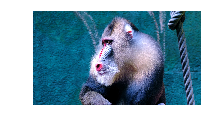

In [102]:
path = './' #The path of your test image
img = open_image(get_image_files(path)[0])
pred_class,pred_idx,outputs = learn.predict(img)
img.show()
print ("It is a", pred_class)

### Great job completing, reading, or skimming through this tutorial. 

**Acknowledgment:** This tutorial uses [fastai library](https://docs.fast.ai/index.html), so we thank Jeremy Howard and [fast.ai](https://www.fast.ai/).